In [ ]:
word_list = [
    'apple', 'orange', 'banana', 'grape', 'kiwi',
    'car', 'bus', 'bicycle', 'motorcycle', 'truck',
    'dog', 'cat', 'bird', 'fish', 'rabbit',
    'book', 'pen', 'paper', 'pencil', 'notebook',
    'tree', 'flower', 'grass', 'mountain', 'river',
    'computer', 'keyboard', 'mouse', 'monitor', 'laptop',
    'teacher', 'student', 'school', 'classroom', 'education',
    'doctor', 'nurse', 'hospital', 'patient', 'medicine',
    'chef', 'restaurant', 'food', 'cook', 'menu'
]

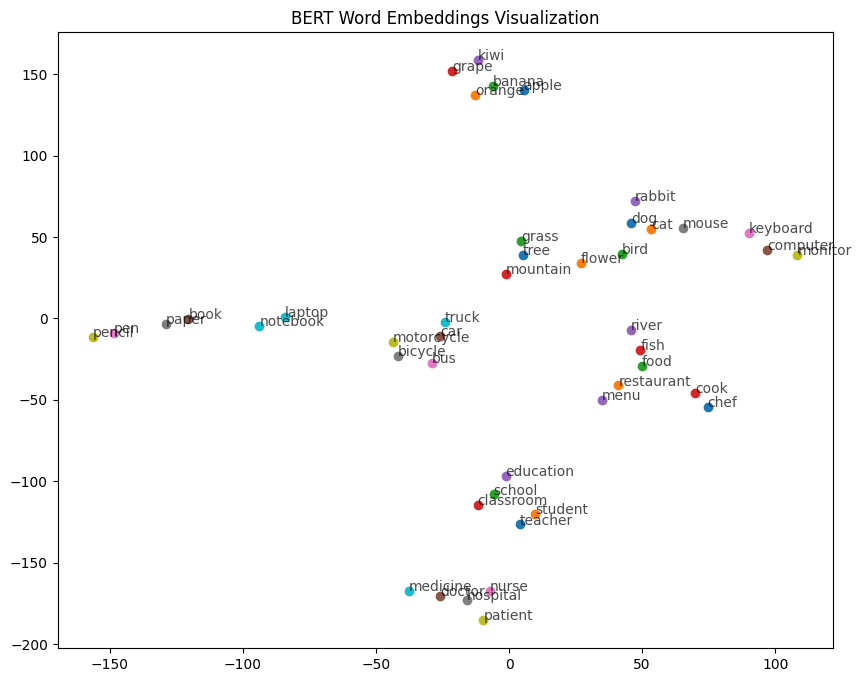

In [ ]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define the BERT model
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

# Preprocess the word list
word_list = [word.lower() for word in word_list]

# Create word embeddings using BERT
embeddings = model(word_list)

# Reduce dimensionality for visualization
embeddings_2d = TSNE(n_components=2, learning_rate='auto',
                     init='random', perplexity=3).fit_transform(embeddings)

# Visualize the word embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(word_list):
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), alpha=0.7)

plt.title('BERT Word Embeddings Visualization')
plt.show()


In [ ]:
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


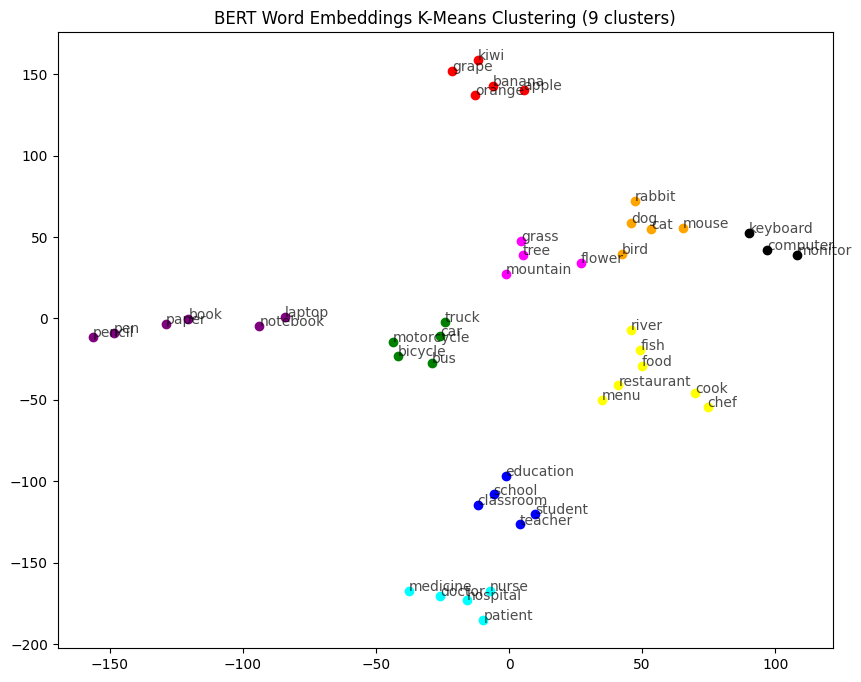

In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering with 9 clusters
kmeans = KMeans(n_clusters=9)
kmeans.fit(embeddings_2d)

# Assign colors to each cluster
cluster_colors = {
    0: 'green',
    1: 'red',
    2: 'blue',
    3: 'orange',
    4: 'purple',
    5: 'yellow',
    6: 'cyan',
    7: 'magenta',
    8: 'black'
}

# Plot the clustered word embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(word_list):
    cluster_label = kmeans.labels_[i]
    color = cluster_colors[cluster_label]
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y, c=color)
    plt.annotate(word, (x, y), alpha=0.7)

plt.title('BERT Word Embeddings K-Means Clustering (9 clusters)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

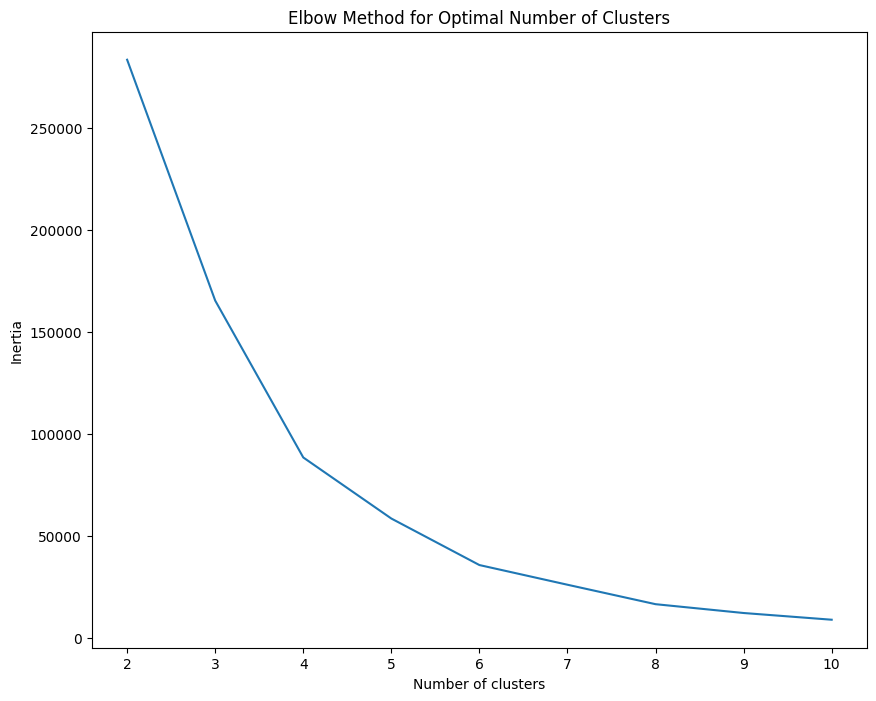

In [ ]:
# Calculate inertia for different numbers of clusters
inertia_list = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embeddings_2d)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), inertia_list)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

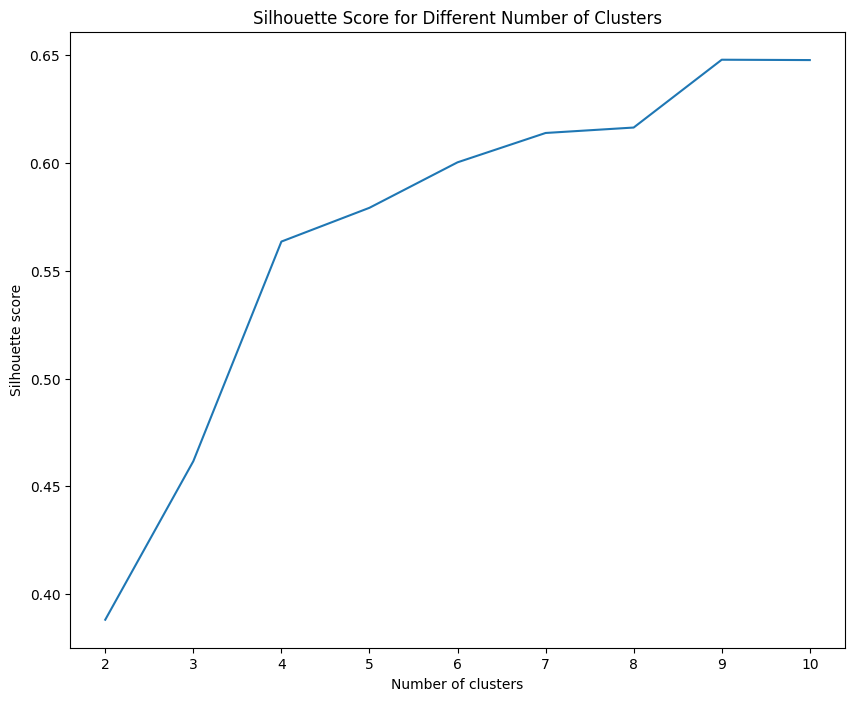

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embeddings_2d)
    silhouette_scores.append(silhouette_score(embeddings_2d, kmeans.labels_))

# Plot the silhouette score plot
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [ ]:
# Calculate silhouette score
silhouette_avg_K = silhouette_score(embeddings_2d, kmeans.labels_)

print("Silhouette score for 9 clusters:", silhouette_avg)


Silhouette score for 9 clusters: 0.62675923


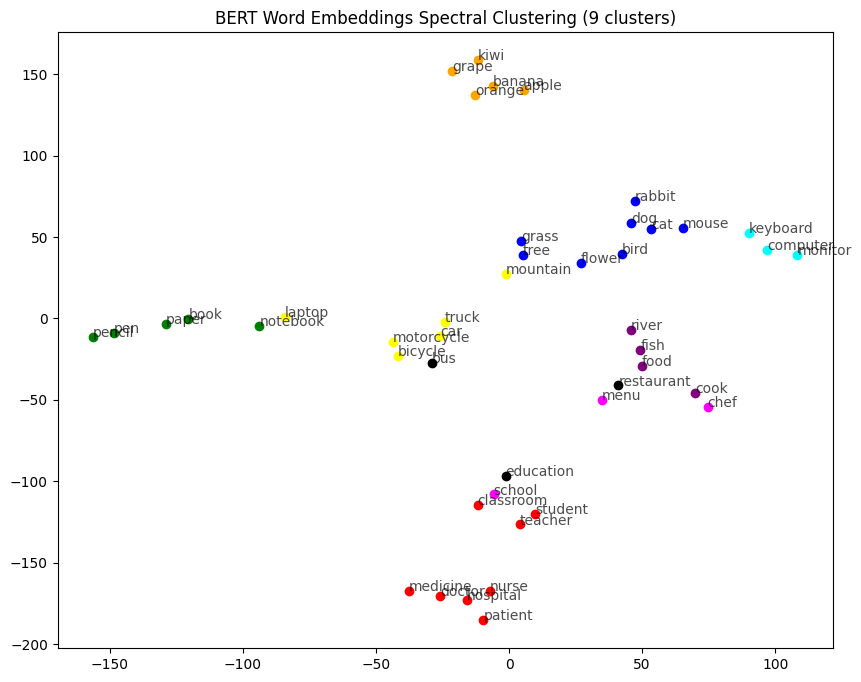

In [ ]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering with 9 clusters
spectral_clustering = SpectralClustering(n_clusters=9, affinity='nearest_neighbors')
spectral_labels = spectral_clustering.fit_predict(embeddings_2d)

# Assign colors to each cluster
cluster_colors = {
    0: 'green',
    1: 'red',
    2: 'blue',
    3: 'orange',
    4: 'purple',
    5: 'yellow',
    6: 'cyan',
    7: 'magenta',
    8: 'black'
}

# Plot the clustered word embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(word_list):
    cluster_label = spectral_labels[i]
    color = cluster_colors[cluster_label]
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y, c=color)
    plt.annotate(word, (x, y), alpha=0.7)

plt.title('BERT Word Embeddings Spectral Clustering (9 clusters)')
plt.show()


In [ ]:
# Calculate silhouette score
silhouette_avg_S = silhouette_score(embeddings_2d, spectral_labels)

print("Silhouette score for spectral clustering:", silhouette_avg)


Silhouette score for spectral clustering: 0.62675923


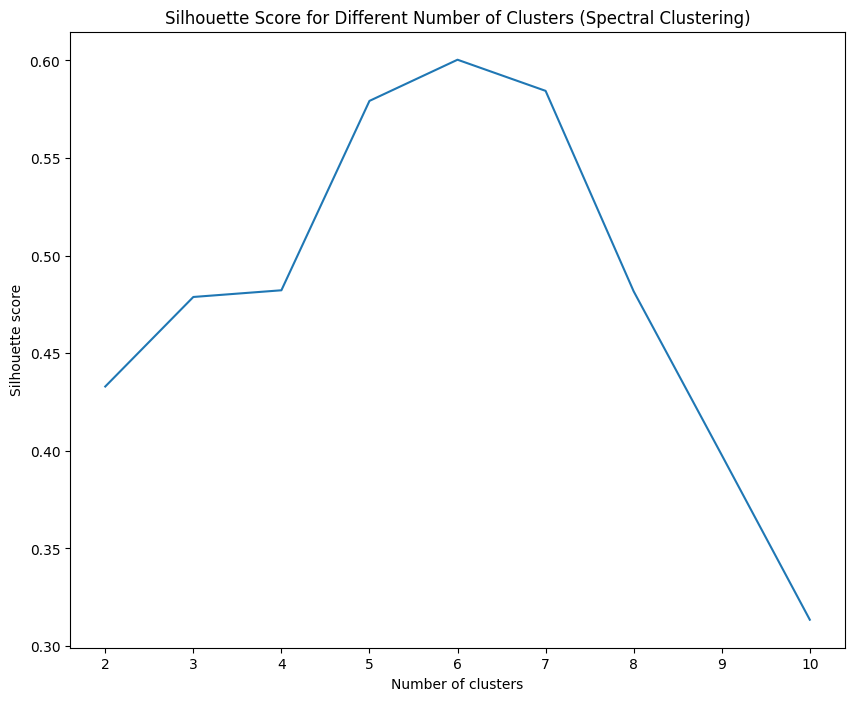

In [ ]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    spectral_labels = spectral_clustering.fit_predict(embeddings_2d)
    silhouette_scores.append(silhouette_score(embeddings_2d, spectral_labels))

# Plot the silhouette score plot
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Different Number of Clusters (Spectral Clustering)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


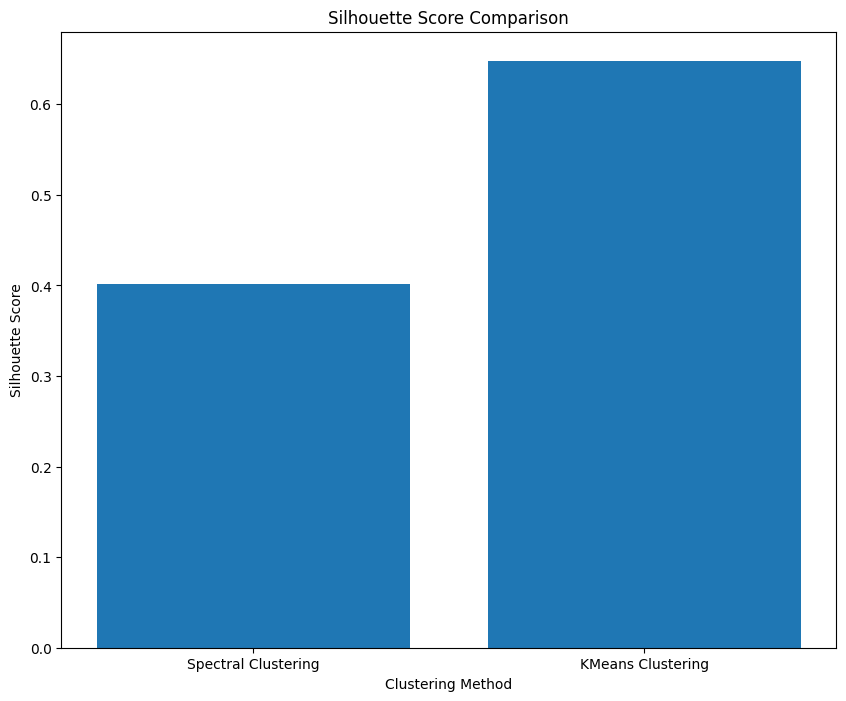

In [ ]:

# Compare the silhouette scores for spectral clustering and kmeans clustering
plt.figure(figsize=(10, 8))
plt.bar(['Spectral Clustering', 'KMeans Clustering'], [silhouette_avg_S, silhouette_avg_K])
plt.title('Silhouette Score Comparison')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.show()
